In [3]:
# Directory 
import os
os.chdir("/home/jovyan/work/GP")
print(os.getcwd())

/home/jovyan/work/GP


In [56]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import patches
import seaborn as sns
import scipy.stats as stats

In [20]:
# Read & Check data
Accident_London_vru = pd.read_csv("df_per_coll_London_vru_s1_correct.csv")
print(
    f"There are {Accident_London_vru.shape[0]} rows and {Accident_London_vru.shape[1]} columns."
)#df size
print(Accident_London_vru["police_force"].value_counts()) # London [1,48]
print(Accident_London_vru["casualty_type"].value_counts()) # VRU
print(Accident_London_vru.columns) # mixed types of variables in 'accident_index_x' and 'accident_reference_x'

There are 75963 rows and 23 columns.
police_force
1     75161
48      802
Name: count, dtype: int64
casualty_type
1     24594
0     22292
3     20348
5      3592
4      3006
2      1655
23      295
97       92
22       89
Name: count, dtype: int64
Index(['accident_index', 'accident_year_x', 'accident_reference_x',
       'longitude', 'latitude', 'police_force', 'accident_severity', 'date',
       'day_of_week', 'local_authority_district', 'road_type', 'speed_limit',
       'light_conditions', 'weather_conditions', 'road_surface_conditions',
       'lsoa_of_accident_location', 'casualty_class', 'sex_of_casualty',
       'casualty_severity', 'pedestrian_location', 'casualty_type',
       'casualty_distance_banding', 'time'],
      dtype='object')


/tmp/ipykernel_381/4039250167.py:2: DtypeWarning: Columns (0,2) have mixed types. Specify dtype option on import or set low_memory=False.
  Accident_London_vru = pd.read_csv("df_per_coll_London_vru_s1_correct.csv")


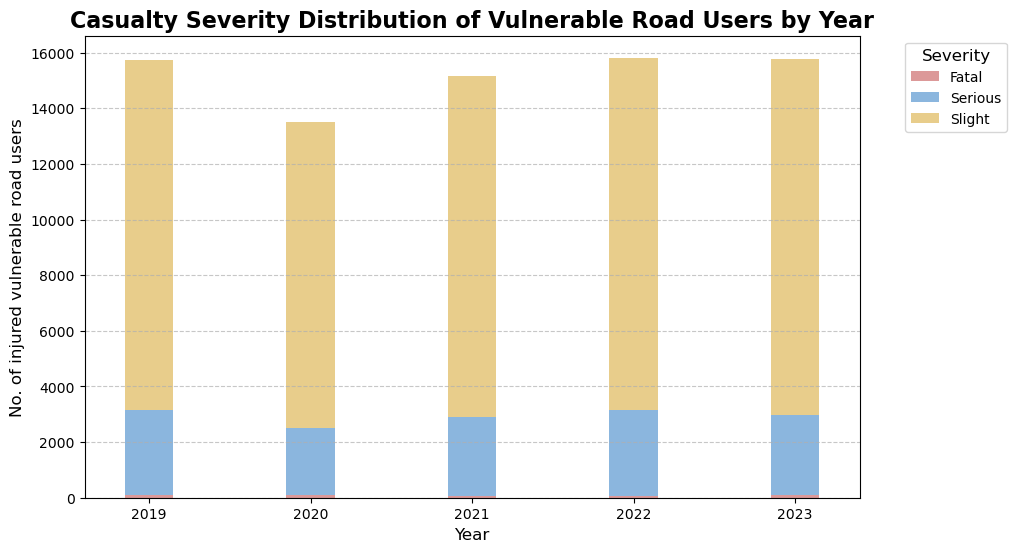

In [42]:
# 使用新配色方案
colors = ['#D98E8E', '#7FAEDB', '#E6C87F']  # 红、蓝、黄

# 绘制堆叠柱状图
ax = severity_distribution.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    color=colors,
    alpha=0.9,
    width=0.3  # 调整柱状宽度
)

# 图表美化
plt.title('Casualty Severity Distribution of Vulnerable Road Users by Year', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('No. of injured vulnerable road users', fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)

# 调整图例位置
plt.legend(
    title='Severity',
    fontsize=10,
    title_fontsize=12,
    bbox_to_anchor=(1.05, 1),  # 图例放在图表右侧
    loc='upper left'
)

# 显示网格线
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 显示图表
plt.show()

In [48]:
# 查看日期行
random_rows = Accident_London_vru.sample(n=5)
print(random_rows[['date']])
print(Accident_London_vru['date'].dtype)
# 转换成日期
Accident_London_vru['date'] = pd.to_datetime(Accident_London_vru['date'], errors='coerce')
# 输出转换后的数据类型
print(Accident_London_vru['date'].dtype)

             date
75281  17/12/2023
22259  26/07/2020
30262  15/02/2021
57223  28/10/2022
38137  23/08/2021
object
datetime64[ns]


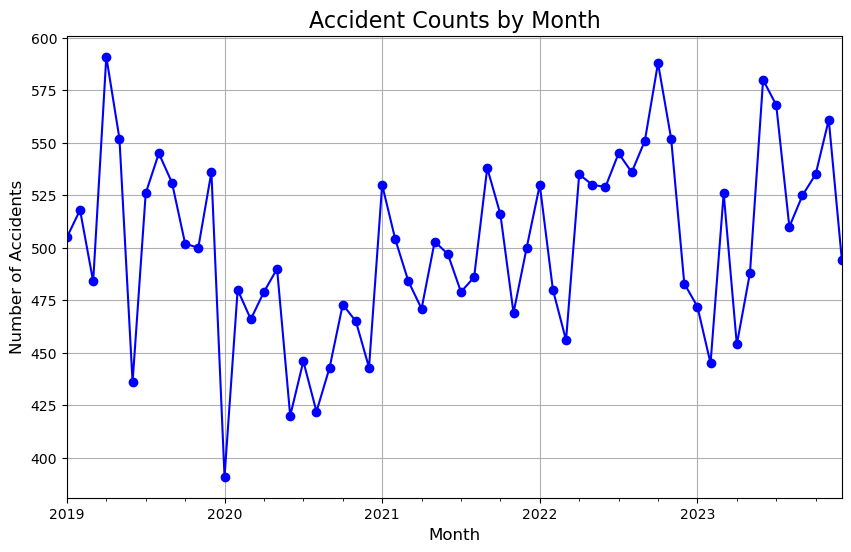

In [49]:
# Monthly （total number）
# 提取每个月的数据
Accident_London_vru['month'] = Accident_London_vru['date'].dt.to_period('M')

# 按月统计事故数量
monthly_counts = Accident_London_vru.groupby('month').size()

# 绘制折线图
plt.figure(figsize=(10, 6))
monthly_counts.plot(kind='line', marker='o', linestyle='-', color='b')

# 设置图表标题和标签
plt.title('Accident Counts by Month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)

# 显示网格
plt.grid(True)

# 显示图表
plt.show()

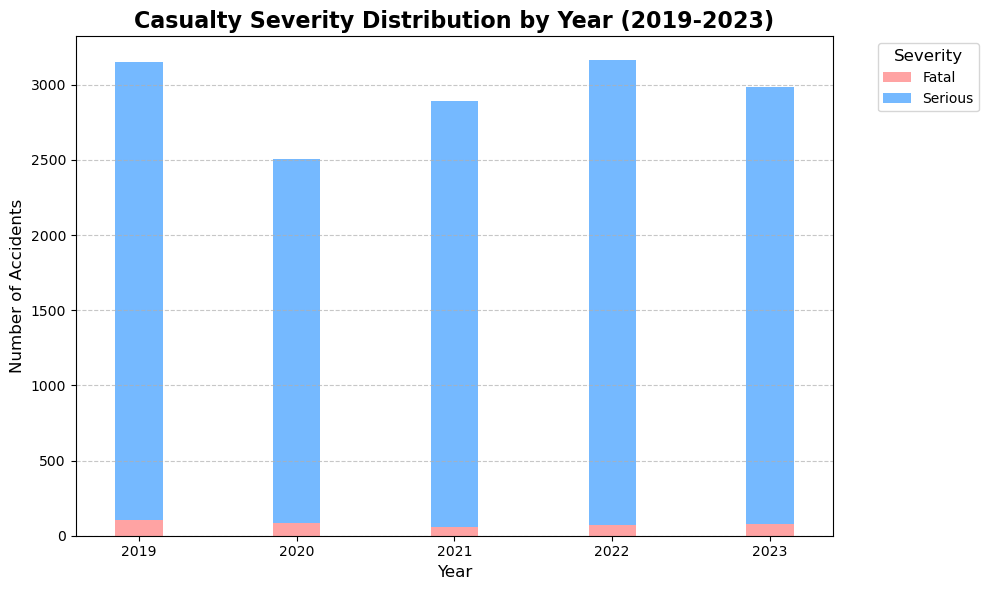

In [54]:
# 筛选出 severity 为 1 (fatal) 和 2 (serious) 的数据
severity_data = Accident_London_vru[Accident_London_vru['casualty_severity'].isin([1, 2])].copy()

# 按年份和 severity 统计每种严重性的事故数量
severity_distribution = severity_data.groupby(['accident_year_x', 'casualty_severity']).size().unstack(fill_value=0)

# 设置严重等级的标签
severity_labels = {1: 'Fatal', 2: 'Serious'}
severity_distribution.rename(columns=severity_labels, inplace=True)

# 绘制堆叠柱状图
colors = ['#FF9999', '#66B2FF']  # 自定义颜色：红色代表Fatal，蓝色代表Serious
ax = severity_distribution.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    color=colors,
    alpha=0.9,
    width=0.3  # 调整柱状宽度
)

# 图表美化
plt.title('Casualty Severity Distribution by Year (2019-2023)', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)

# 调整图例位置
plt.legend(
    title='Severity',
    fontsize=10,
    title_fontsize=12,
    bbox_to_anchor=(1.05, 1),  # 图例放在图表右侧
    loc='upper left'
)

# 显示网格线
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 显示图表
plt.tight_layout()  # 自动调整布局
plt.show()

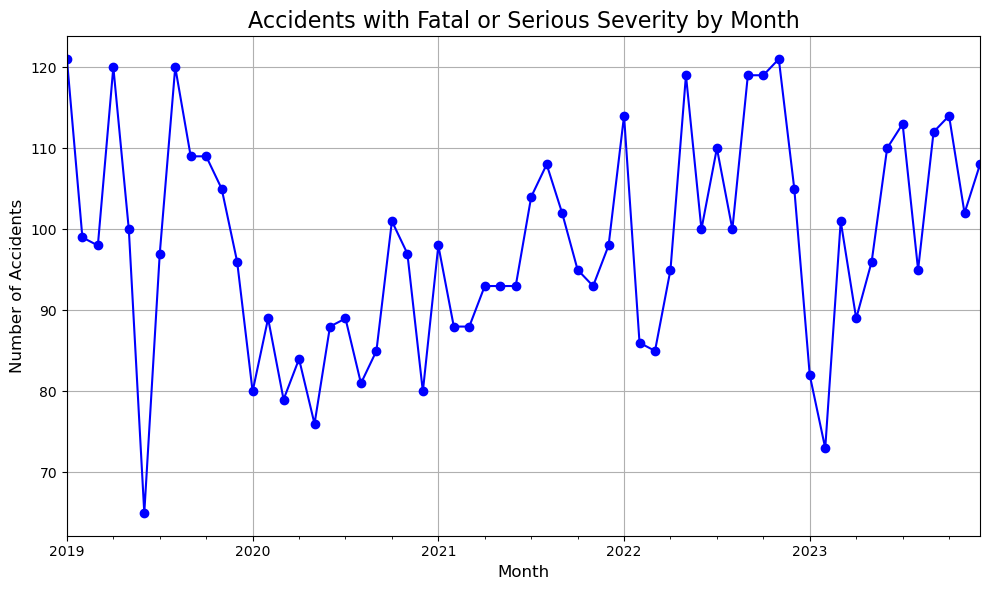

In [52]:
# 筛选出 severity 为 1 (fatal) 和 2 (serious) 的数据
severity_data = Accident_London_vru[Accident_London_vru['casualty_severity'].isin([1, 2])].copy()

# 提取每月的数据
severity_data.loc[:, 'month'] = severity_data['date'].dt.to_period('M')

# 按月统计 severity 1 和 severity 2 的事故数量
monthly_counts = severity_data.groupby('month').size()

# 绘制折线图
plt.figure(figsize=(10, 6))
monthly_counts.plot(kind='line', marker='o', linestyle='-', color='b')

# 设置图表标题和标签
plt.title('Accidents with Fatal or Serious Severity by Month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)

# 显示网格
plt.grid(True)

# 显示图表
plt.tight_layout()  # 自动调整布局
plt.show()

In [63]:
# chi-square 1: all injuries between 2019， 2022 & 2023
# 筛选出2019, 2022, 和2023的年份数据
years = [2019, 2022, 2023]
filtered_data = Accident_London_vru[Accident_London_vru['accident_year_x'].isin(years)]

# 按年份和 casualty_severity 统计频次
contingency_table = pd.crosstab(filtered_data['accident_year_x'], filtered_data['casualty_severity'])

# 打印列联表
print("Contingency Table:")
print(contingency_table)

# 进行卡方检验
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# 输出卡方检验结果
print("\nChi-square Test Results:")
print(f"Chi-square Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected frequencies table: \n{expected}")

# 判断是否拒绝原假设
alpha = 0.05  # 显著性水平
if p < alpha:
    print("\nReject the null hypothesis: There is no significant difference between year and casualty severity.")
else:
    print("\nFail to reject the null hypothesis: There is significant difference between year and casualty severity.")

Contingency Table:
casualty_severity    1     2      3
accident_year_x                    
2019               105  3045  12570
2022                71  3093  12653
2023                81  2907  12793

Chi-square Test Results:
Chi-square Statistic: 15.016068428753998
P-value: 0.004668005923446838
Degrees of Freedom: 4
Expected frequencies table: 
[[   85.38061626  3004.93258379 12629.68679995]
 [   85.90745594  3023.4744706  12707.61807346]
 [   85.71192781  3016.5929456  12678.69512659]]

Reject the null hypothesis: There is no significant difference between year and casualty severity.


In [64]:
# chi-square 2: all injuries between 2019 and 2022
# 筛选出2019, 2022, 和2023的年份数据
years = [2019, 2022]
filtered_data_1 = Accident_London_vru[Accident_London_vru['accident_year_x'].isin(years)]

# 按年份和 casualty_severity 统计频次
contingency_table = pd.crosstab(filtered_data_1['accident_year_x'], filtered_data_1['casualty_severity'])

# 打印列联表
print("Contingency Table:")
print(contingency_table)

# 进行卡方检验
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# 输出卡方检验结果
print("\nChi-square Test Results:")
print(f"Chi-square Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected frequencies table: \n{expected}")

# 判断是否拒绝原假设
alpha = 0.05  # 显著性水平
if p < alpha:
    print("\nReject the null hypothesis: There is no significant difference between year and casualty severity.")
else:
    print("\nFail to reject the null hypothesis: There is significant difference between year and casualty severity.")

Contingency Table:
casualty_severity    1     2      3
accident_year_x                    
2019               105  3045  12570
2022                71  3093  12653

Chi-square Test Results:
Chi-square Statistic: 6.918389600856254
P-value: 0.03145507944070991
Degrees of Freedom: 2
Expected frequencies table: 
[[   87.7293338   3059.56051622 12572.71014998]
 [   88.2706662   3078.43948378 12650.28985002]]

Reject the null hypothesis: There is no significant difference between year and casualty severity.


In [65]:
# chi-square 3: all injuries between 2019 and 2023
# 筛选出2019, 2022, 和2023的年份数据
years = [2019, 2023]
filtered_data_2 = Accident_London_vru[Accident_London_vru['accident_year_x'].isin(years)]

# 按年份和 casualty_severity 统计频次
contingency_table = pd.crosstab(filtered_data_2['accident_year_x'], filtered_data_2['casualty_severity'])

# 打印列联表
print("Contingency Table:")
print(contingency_table)

# 进行卡方检验
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# 输出卡方检验结果
print("\nChi-square Test Results:")
print(f"Chi-square Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected frequencies table: \n{expected}")

# 判断是否拒绝原假设
alpha = 0.05  # 显著性水平
if p < alpha:
    print("\nReject the null hypothesis: There is no significant difference between year and casualty severity.")
else:
    print("\nFail to reject the null hypothesis: There is significant difference between year and casualty severity.")

Contingency Table:
casualty_severity    1     2      3
accident_year_x                    
2019               105  3045  12570
2023                81  2907  12793

Chi-square Test Results:
Chi-square Statistic: 8.138969023286913
P-value: 0.01708619397178275
Degrees of Freedom: 2
Expected frequencies table: 
[[   92.81991048  2970.23713533 12656.94295419]
 [   93.18008952  2981.76286467 12706.05704581]]

Reject the null hypothesis: There is no significant difference between year and casualty severity.


In [66]:
# chi-square 4: KSI between 2019,2022,and 2023
# 筛选出2019, 2022, 和2023的年份数据
years = [2019, 2022, 2023]
filtered_data = Accident_London_vru[Accident_London_vru['accident_year_x'].isin(years)]

# 只选择致命和严重事故（casualty_severity为1和2）
filtered_data = filtered_data[filtered_data['casualty_severity'].isin([1, 2])]

# 按年份和 casualty_severity 统计频次
contingency_table = pd.crosstab(filtered_data['accident_year_x'], filtered_data['casualty_severity'])

# 打印列联表
print("Contingency Table (Fatal vs Serious):")
print(contingency_table)

# 进行卡方检验
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# 输出卡方检验结果
print("\nChi-square Test Results:")
print(f"Chi-square Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected frequencies table: \n{expected}")

# 判断是否拒绝原假设
alpha = 0.05  # 显著性水平
if p < alpha:
    print("\nReject the null hypothesis: There is a significant relationship between year and casualty severity (Fatal vs Serious).")
else:
    print("\nFail to reject the null hypothesis: There is no significant relationship between year and casualty severity (Fatal vs Serious).")

Contingency Table (Fatal vs Serious):
casualty_severity    1     2
accident_year_x             
2019               105  3045
2022                71  3093
2023                81  2907

Chi-square Test Results:
Chi-square Statistic: 7.01666027088063
P-value: 0.029946879940990177
Degrees of Freedom: 2
Expected frequencies table: 
[[  87.02967104 3062.97032896]
 [  87.41646958 3076.58353042]
 [  82.55385939 2905.44614061]]

Reject the null hypothesis: There is a significant relationship between year and casualty severity (Fatal vs Serious).


In [ ]:
# ！！！ KSI probrobility or accident rates 